In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

### for visualizing the tree, we need to note down the Gini values after each iteration (that is at each node) and save it in .dot format and then visualize in a separate software

In [2]:
df = pd.read_csv('titanic.csv')
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### The following test cases are solved below using decision tree:

#### Target variable is whether the passenger survived ot not (and model predicting yes or no)
#### 1 = yes, survived.....                              0 = No, did not survive 

1. subsetted data set as it is (using train test split)
2. subsetted data set by imputing NaN values (using train test split)
3. subsetted data set by dropping NaN value rows
4. full data set as it is (using train test split)
5. full data set by imputing NaN values (using train test split)
6. full data set by dropping NaN value rows


#### Using LabelEncoder...we need to encode each categorical column individually. Add them to the dataframe

#### but using pd.get_dummies method, we get all the requirements fulfilled with less efforts.

#### So, the categorical encoding is done using the same

#### Here the 'PClass' column is meant to be categorical variable (viz, 1,2,3), but is treated as numerical variable
#### Here the 'SibSp' column is meant to be categorical variable(No. of siblings) (viz, 1,2,3), but is treated as numerical variable

So conerting them to categorical variables

In [5]:
df['Pclass'] = df['Pclass'].astype('object')
df['SibSp'] = df['SibSp'].astype('object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [7]:
print(df['Pclass'].unique())
print(df['SibSp'].unique())

[3 1 2]
[1 0 3 4 2 5 8]


# 1. subsetted data set as it is

In [8]:
data1 = df.copy(deep = True)

In [9]:
data1 = data1[['Survived','Pclass','Age','Sex','Fare',]]
data1

,Survived,Pclass,Age,Sex,Fare
0,0,3,22.0,male,7.2500
1,1,1,38.0,female,71.2833
2,1,3,26.0,female,7.9250
3,1,1,35.0,female,53.1000
4,0,3,35.0,male,8.0500
...,...,...,...,...,...
886,0,2,27.0,male,13.0000
887,1,1,19.0,female,30.0000
888,0,3,NaN,female,23.4500
889,1,1,26.0,male,30.0000


In [10]:
data1_dummy = pd.get_dummies(data1, drop_first = True)
data1_dummy

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,1,1
1,1,38.0,71.2833,0,0,0
2,1,26.0,7.9250,0,1,0
3,1,35.0,53.1000,0,0,0
4,0,35.0,8.0500,0,1,1
...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1
887,1,19.0,30.0000,0,0,0
888,0,NaN,23.4500,0,1,0
889,1,26.0,30.0000,0,0,1


In [11]:
X1 = data1_dummy.drop(['Survived'], axis = 1)
X1

,Age,Fare,Pclass_2,Pclass_3,Sex_male
0,22.0,7.2500,0,1,1
1,38.0,71.2833,0,0,0
2,26.0,7.9250,0,1,0
3,35.0,53.1000,0,0,0
4,35.0,8.0500,0,1,1
...,...,...,...,...,...
886,27.0,13.0000,1,0,1
887,19.0,30.0000,0,0,0
888,NaN,23.4500,0,1,0
889,26.0,30.0000,0,0,1


In [12]:
Y1 = data1_dummy['Survived']
Y1

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.2, )

#### A. Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
tree1 = DecisionTreeClassifier()

In [16]:
tree1.fit(X1_train, y1_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [17]:
## Shows Error as it contains NaN values

#### B. Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_reg1 = LogisticRegression()

In [20]:
log_reg1.fit(X1_train, y1_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
### Shows error as it contains NaN Values

# 2. subsetted data set by imputing NaN values

In [21]:
data2 = df.copy(deep = True)
data2 = data2[['Survived','Pclass','Age','Sex','Fare',]]
data2

,Survived,Pclass,Age,Sex,Fare
0,0,3,22.0,male,7.2500
1,1,1,38.0,female,71.2833
2,1,3,26.0,female,7.9250
3,1,1,35.0,female,53.1000
4,0,3,35.0,male,8.0500
...,...,...,...,...,...
886,0,2,27.0,male,13.0000
887,1,1,19.0,female,30.0000
888,0,3,NaN,female,23.4500
889,1,1,26.0,male,30.0000


In [22]:
data2.isnull().sum()

Survived      0
Pclass        0
Age         177
Sex           0
Fare          0
dtype: int64

imputng the NaN values in Age column with its median value

In [23]:
data2['Age'].fillna(data2['Age'].median(), inplace=True)

In [24]:
data2.isnull().sum()

Survived    0
Pclass      0
Age         0
Sex         0
Fare        0
dtype: int64

In [25]:
data2_dummy = pd.get_dummies(data2, drop_first = True)
data2_dummy

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,1,1
1,1,38.0,71.2833,0,0,0
2,1,26.0,7.9250,0,1,0
3,1,35.0,53.1000,0,0,0
4,0,35.0,8.0500,0,1,1
...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1
887,1,19.0,30.0000,0,0,0
888,0,28.0,23.4500,0,1,0
889,1,26.0,30.0000,0,0,1


In [26]:
X2 = data2_dummy.drop(['Survived'], axis = 1)
X2

,Age,Fare,Pclass_2,Pclass_3,Sex_male
0,22.0,7.2500,0,1,1
1,38.0,71.2833,0,0,0
2,26.0,7.9250,0,1,0
3,35.0,53.1000,0,0,0
4,35.0,8.0500,0,1,1
...,...,...,...,...,...
886,27.0,13.0000,1,0,1
887,19.0,30.0000,0,0,0
888,28.0,23.4500,0,1,0
889,26.0,30.0000,0,0,1


In [27]:
Y2 = data2_dummy['Survived']
Y2

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [28]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2 )

#### A. Decision Tree

In [29]:
tree2 = DecisionTreeClassifier()

In [30]:
tree2.fit(X2_train, y2_train)

DecisionTreeClassifier()

In [96]:
predictions2 = tree2.predict(X2_test)

In [97]:
print(f"Accuracy score of model on training dataset: {tree2.score(X2_train, y2_train)}")
print(f"Accuracy score of model on testing dataset:{tree2.score(X2_test, y2_test)}")

Accuracy score of model on training dataset: 0.976123595505618
Accuracy score of model on testing dataset:0.8268156424581006


In [98]:
acc_2 = accuracy_score(y2_test, predictions2)
acc_2

0.8268156424581006

In [99]:
cm2 = confusion_matrix(y2_test, predictions2)
cm2

array([[90, 16],
       [15, 58]], dtype=int64)

Text(33.0, 0.5, 'Truth')

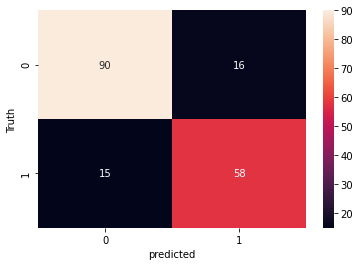

In [100]:
sns.heatmap(cm2, annot = True)
plt.xlabel("predicted")
plt.ylabel('Truth')

In [103]:
misclassified_samples2 = (y2_test != predictions2).sum()
print(f"Misclassified samples: {misclassified_samples2} out of {len(y2_test)}")

Misclassified samples: 31 out of 179


# 3. subsetted data set by dropping NaN value rows

In [85]:
data3 = df.copy(deep = True)
data3 = data3[['Survived','Pclass','Age','Sex','Fare',]]
data3

,Survived,Pclass,Age,Sex,Fare
0,0,3,22.0,male,7.2500
1,1,1,38.0,female,71.2833
2,1,3,26.0,female,7.9250
3,1,1,35.0,female,53.1000
4,0,3,35.0,male,8.0500
...,...,...,...,...,...
886,0,2,27.0,male,13.0000
887,1,1,19.0,female,30.0000
888,0,3,NaN,female,23.4500
889,1,1,26.0,male,30.0000


In [86]:
data3.isnull().sum()

Survived      0
Pclass        0
Age         177
Sex           0
Fare          0
dtype: int64

In [87]:
data3.dropna(axis = 0, inplace = True)

In [88]:
print(data3)

     Survived Pclass   Age     Sex     Fare
0           0      3  22.0    male   7.2500
1           1      1  38.0  female  71.2833
2           1      3  26.0  female   7.9250
3           1      1  35.0  female  53.1000
4           0      3  35.0    male   8.0500
..        ...    ...   ...     ...      ...
885         0      3  39.0  female  29.1250
886         0      2  27.0    male  13.0000
887         1      1  19.0  female  30.0000
889         1      1  26.0    male  30.0000
890         0      3  32.0    male   7.7500

[714 rows x 5 columns]


In [89]:
data3_dummy = pd.get_dummies(data3, drop_first = True)
data3_dummy

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,1,1
1,1,38.0,71.2833,0,0,0
2,1,26.0,7.9250,0,1,0
3,1,35.0,53.1000,0,0,0
4,0,35.0,8.0500,0,1,1
...,...,...,...,...,...,...
885,0,39.0,29.1250,0,1,0
886,0,27.0,13.0000,1,0,1
887,1,19.0,30.0000,0,0,0
889,1,26.0,30.0000,0,0,1


In [90]:
X3 = data3_dummy.drop(['Survived'], axis = 1)
X3

,Age,Fare,Pclass_2,Pclass_3,Sex_male
0,22.0,7.2500,0,1,1
1,38.0,71.2833,0,0,0
2,26.0,7.9250,0,1,0
3,35.0,53.1000,0,0,0
4,35.0,8.0500,0,1,1
...,...,...,...,...,...
885,39.0,29.1250,0,1,0
886,27.0,13.0000,1,0,1
887,19.0,30.0000,0,0,0
889,26.0,30.0000,0,0,1


In [91]:
Y3 = data3_dummy['Survived']
Y3

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [92]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size = 0.2 )

#### A. Decision Tree Classifier

In [93]:
tree3 = DecisionTreeClassifier()

In [94]:
tree3.fit(X3_train, y3_train)

DecisionTreeClassifier()

In [95]:
predictions3 = tree3.predict(X3_test)

In [104]:
print(f"Accuracy score of model on training dataset: {tree3.score(X3_train, y3_train)}")
print(f"Accuracy score of model on testing dataset:{tree3.score(X3_test, y3_test)}")

Accuracy score of model on training dataset: 0.9859894921190894
Accuracy score of model on testing dataset:0.7832167832167832


In [105]:
acc_3= accuracy_score(y3_test, predictions3)
acc_3

0.7832167832167832

In [106]:
cm3 = confusion_matrix(y3_test, predictions3)
cm3

array([[72, 14],
       [17, 40]], dtype=int64)

Text(33.0, 0.5, 'Truth')

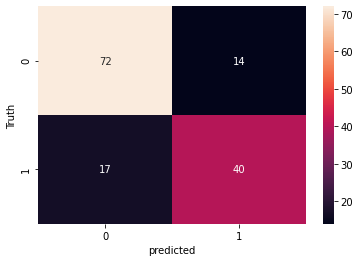

In [107]:
sns.heatmap(cm3, annot = True)
plt.xlabel("predicted")
plt.ylabel('Truth')

In [108]:
misclassified_samples3 = (y3_test != predictions3).sum()
print(f"Misclassified samples: {misclassified_samples3} out of {len(y3_test)}")

Misclassified samples: 31 out of 143


#### For full dataset, there are some columns that do not hold relevance on survived the accident or succumbed to the accident. So, those columns are dropped
1. PassengerId
2. Name	
3. Ticket

# 4. full data set as it is

In [111]:
data4 = df.copy(deep = True)
data4.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
data4

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [112]:
data4_dummy = pd.get_dummies(data4, drop_first = True)
data4_dummy

,Survived,Age,Parch,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,0,22.0,0,7.2500,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.0,0,71.2833,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,7.9250,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,0,53.1000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,35.0,0,8.0500,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,13.0000,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1,19.0,0,30.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,NaN,2,23.4500,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,26.0,0,30.0000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
X4 = data4_dummy.drop(['Survived'], axis = 1)
X4

,Age,Parch,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,22.0,0,7.2500,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,0,71.2833,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,0,7.9250,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,0,53.1000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,0,8.0500,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,13.0000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,19.0,0,30.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,NaN,2,23.4500,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,26.0,0,30.0000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
Y4 = data4_dummy['Survived']
Y4

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [115]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size = 0.2 )

#### A. Decision Tree Classifier

In [116]:
tree4 = DecisionTreeClassifier()

In [117]:
tree4.fit(X4_train, y4_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [118]:
## Shows error as it contains NaN values

# 5. full data set by imputing NaN values

In [123]:
data5 = df.copy(deep = True)
data5.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
data5

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [124]:
data5.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age is imputed by median value

As cabin column contains very high no. of NaN (i.e. 687 out 0f 891)... it is not advisable to impute such high data. At the same time we cannot drop the records (rows). So, the best feasible option is to drop the entire column

Embarked is imputed by its median value

In [125]:
data5['Age'].fillna(data5['Age'].median() , inplace = True)
data5.drop(['Cabin'], axis = 1, inplace = True)
data5['Embarked'].fillna(data5['Embarked'].value_counts().index[0] , inplace = True)

In [128]:
data5.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [129]:
data5_dummy = pd.get_dummies(data5, drop_first = True)
data5_dummy

,Survived,Age,Parch,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S
0,0,22.0,0,7.2500,0,1,1,1,0,0,0,0,0,0,1
1,1,38.0,0,71.2833,0,0,0,1,0,0,0,0,0,0,0
2,1,26.0,0,7.9250,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,0,53.1000,0,0,0,1,0,0,0,0,0,0,1
4,0,35.0,0,8.0500,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,13.0000,1,0,1,0,0,0,0,0,0,0,1
887,1,19.0,0,30.0000,0,0,0,0,0,0,0,0,0,0,1
888,0,28.0,2,23.4500,0,1,0,1,0,0,0,0,0,0,1
889,1,26.0,0,30.0000,0,0,1,0,0,0,0,0,0,0,0


In [130]:
X5 = data5_dummy.drop(['Survived'], axis = 1)
X5

,Age,Parch,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S
0,22.0,0,7.2500,0,1,1,1,0,0,0,0,0,0,1
1,38.0,0,71.2833,0,0,0,1,0,0,0,0,0,0,0
2,26.0,0,7.9250,0,1,0,0,0,0,0,0,0,0,1
3,35.0,0,53.1000,0,0,0,1,0,0,0,0,0,0,1
4,35.0,0,8.0500,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,13.0000,1,0,1,0,0,0,0,0,0,0,1
887,19.0,0,30.0000,0,0,0,0,0,0,0,0,0,0,1
888,28.0,2,23.4500,0,1,0,1,0,0,0,0,0,0,1
889,26.0,0,30.0000,0,0,1,0,0,0,0,0,0,0,0


In [131]:
Y5 = data5_dummy['Survived']
Y5

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [133]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size = 0.2 )

#### A. Decision Tree Classifier

In [136]:
tree5 = DecisionTreeClassifier()

In [137]:
tree5.fit(X5_train, y5_train)

DecisionTreeClassifier()

In [138]:
predictions5 = tree5.predict(X5_test)

In [139]:
print(f"Accuracy score of model on training dataset: {tree5.score(X5_train, y5_train)}")
print(f"Accuracy score of model on testing dataset:{tree5.score(X5_test, y5_test)}")

Accuracy score of model on training dataset: 0.9803370786516854
Accuracy score of model on testing dataset:0.7597765363128491


In [140]:
acc_5 = accuracy_score(y5_test, predictions5)
acc_5

0.7597765363128491

In [142]:
cm5 = confusion_matrix(y5_test, predictions5)
cm5

array([[90, 25],
       [18, 46]], dtype=int64)

Text(33.0, 0.5, 'Truth')

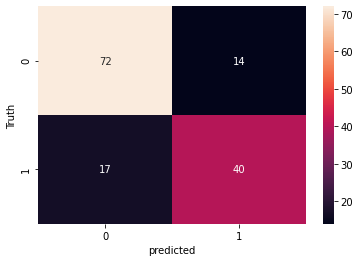

In [143]:
sns.heatmap(cm3, annot = True)
plt.xlabel("predicted")
plt.ylabel('Truth')

In [145]:
misclassified_samples5 = (y5_test != predictions5).sum()
print(f"Misclassified samples: {misclassified_samples5} out of {len(y5_test)}")

Misclassified samples: 43 out of 179


# 6. full data set by dropping NaN value rows

In [146]:
data6 = df.copy(deep = True)
data6.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)
data6

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [148]:
data6.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [152]:
data6.dropna(axis = 0, inplace = True)

In [153]:
data6.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [154]:
data6_dummy = pd.get_dummies(data6, drop_first = True)
data6_dummy

,Survived,Age,Parch,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Embarked_Q,Embarked_S
0,0,22.0,0,7.2500,0,1,1,1,0,0,0,0,0,1
1,1,38.0,0,71.2833,0,0,0,1,0,0,0,0,0,0
2,1,26.0,0,7.9250,0,1,0,0,0,0,0,0,0,1
3,1,35.0,0,53.1000,0,0,0,1,0,0,0,0,0,1
4,0,35.0,0,8.0500,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,5,29.1250,0,1,0,0,0,0,0,0,1,0
886,0,27.0,0,13.0000,1,0,1,0,0,0,0,0,0,1
887,1,19.0,0,30.0000,0,0,0,0,0,0,0,0,0,1
889,1,26.0,0,30.0000,0,0,1,0,0,0,0,0,0,0


In [155]:
X6 = data6_dummy.drop(['Survived'], axis = 1)
X6

,Age,Parch,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Embarked_Q,Embarked_S
0,22.0,0,7.2500,0,1,1,1,0,0,0,0,0,1
1,38.0,0,71.2833,0,0,0,1,0,0,0,0,0,0
2,26.0,0,7.9250,0,1,0,0,0,0,0,0,0,1
3,35.0,0,53.1000,0,0,0,1,0,0,0,0,0,1
4,35.0,0,8.0500,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.0,5,29.1250,0,1,0,0,0,0,0,0,1,0
886,27.0,0,13.0000,1,0,1,0,0,0,0,0,0,1
887,19.0,0,30.0000,0,0,0,0,0,0,0,0,0,1
889,26.0,0,30.0000,0,0,1,0,0,0,0,0,0,0


In [156]:
Y6 = data6_dummy['Survived']
Y6

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [157]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, Y6, test_size = 0.2 )

#### A. Decision Tree classifier

In [158]:
tree6 = DecisionTreeClassifier()

In [159]:
tree6.fit(X6_train, y6_train)

DecisionTreeClassifier()

In [160]:
predictions6 = tree6.predict(X6_test)

In [161]:
print(f"Accuracy score of model on training dataset: {tree6.score(X6_train, y6_train)}")
print(f"Accuracy score of model on testing dataset:{tree6.score(X6_test, y6_test)}")

Accuracy score of model on training dataset: 0.9876977152899824
Accuracy score of model on testing dataset:0.7972027972027972


In [162]:
acc_6 = accuracy_score(y6_test, predictions6)
acc_6

0.7972027972027972

In [163]:
cm6 = confusion_matrix(y6_test, predictions6)
cm6

array([[66, 14],
       [15, 48]], dtype=int64)

Text(33.0, 0.5, 'Truth')

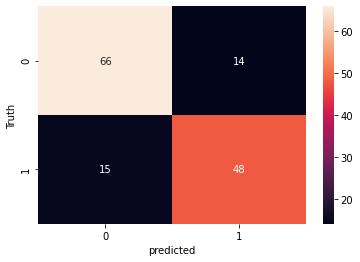

In [164]:
sns.heatmap(cm6, annot = True)
plt.xlabel("predicted")
plt.ylabel('Truth')

In [165]:
misclassified_samples6 = (y6_test != predictions6).sum()
print(f"Misclassified samples: {misclassified_samples6} out of {len(y6_test)}")

Misclassified samples: 29 out of 143
